In [1]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

import torch.optim as optim

from envs.mdp import StochasticMDPEnv
from agents.hdqn_mdp import hDQN, OptimizerSpec
from hdqn import hdqn_learning
from utils.plotting import plot_episode_stats, plot_visited_states
from utils.schedule import LinearSchedule

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
NUM_EPISODES = 12000
BATCH_SIZE = 128
GAMMA = 1.0
REPLAY_MEMORY_SIZE = 1000000
LEARNING_RATE = 0.00025
ALPHA = 0.95
EPS = 0.01

optimizer_spec = OptimizerSpec(
    constructor=optim.RMSprop,
    kwargs=dict(lr=LEARNING_RATE, alpha=ALPHA, eps=EPS),
)

exploration_schedule = LinearSchedule(50000, 0.1, 1)

agent = hDQN(
    optimizer_spec=optimizer_spec,
    replay_memory_size=REPLAY_MEMORY_SIZE,
    batch_size=BATCH_SIZE,
)

env = StochasticMDPEnv()

In [3]:
agent, stats, visits = hdqn_learning(
    env=env,
    agent=agent,
    num_episodes=NUM_EPISODES,
    exploration_schedule=exploration_schedule,
    gamma=GAMMA,
)

/home/jacob/Downloads/IM/pytorch-hdqn/agents/hdqn_mdp.py:177: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(current_Q_values, target_Q_values)
/home/jacob/Downloads/IM/pytorch-hdqn/agents/hdqn_mdp.py:118: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return self.controller(Variable(joint_state_goal, volatile=True)).data.max(1)[1].cpu()
/home/jacob/Downloads/IM/pytorch-hdqn/agents/hdqn_mdp.py:144: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(current_Q_values, target_Q_values)
/home/jacob/Downloads/IM/pytorch-hdqn/agents/hdqn_mdp.py:109: UserWarning: vo

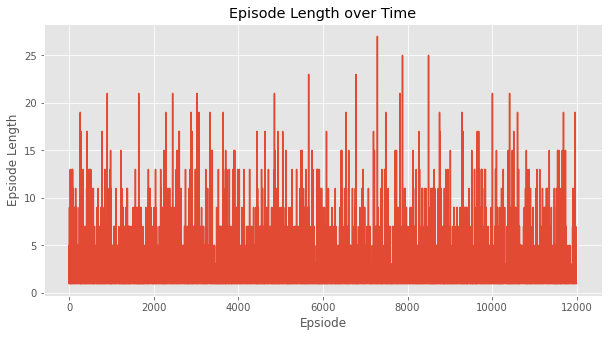

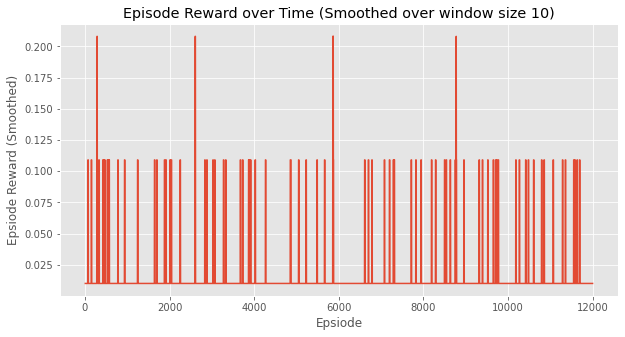

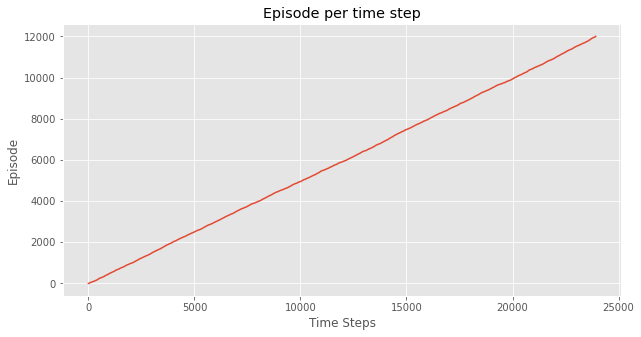

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [4]:
plot_episode_stats(stats)

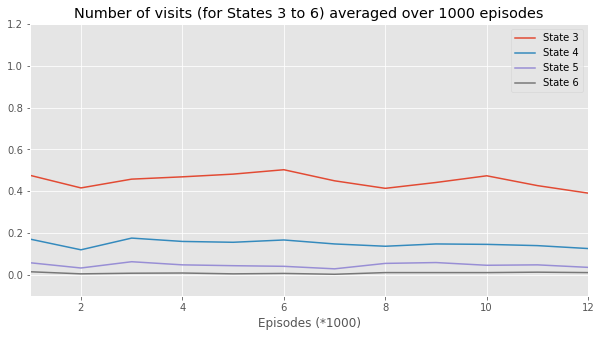

In [5]:
plot_visited_states(visits, NUM_EPISODES)